In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#import csv file data
raw_data=pd.read_csv("Nutrition.csv")
raw_data

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Race/Ethnicity,2 or more races,RACE,RACE2PLUS
1,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Race/Ethnicity,Other,RACE,RACEOTH
2,2011,2011,AK,Alaska,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,2011.0,Value,...,"(64.845079957001, -147.722059036)",PA,PA1,Q044,VALUE,2,Gender,Female,GEN,FEMALE
3,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Age (years),35 - 44,AGEYR,AGEYR3544
4,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q037,VALUE,2,Income,"$15,000 - $24,999",INC,INC1525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104267,2023,2023,WY,Wyoming,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(43.23554134300048, -108.10983035299967)",PA,PA1,Q047,VALUE,56,Education,High school graduate,EDU,EDUHSGRAD
104268,2023,2023,WY,Wyoming,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(43.23554134300048, -108.10983035299967)",PA,PA1,Q047,VALUE,56,Age (years),65 or older,AGEYR,AGEYR65PLUS
104269,2023,2023,WY,Wyoming,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(43.23554134300048, -108.10983035299967)",PA,PA1,Q047,VALUE,56,Income,Data not reported,INC,INCNR
104270,2023,2023,WY,Wyoming,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in muscle-strengt...,NaN,Value,...,"(43.23554134300048, -108.10983035299967)",PA,PA1,Q046,VALUE,56,Education,Less than high school,EDU,EDUHS


Question 1: How does income influence food consumption patterns in the United States over the years?

In [3]:
# Use Function, Loop, Conditional
# Select relevant columns
columns_needed = ['YearStart', 'LocationAbbr','Question', 'Income','Data_Value_Alt']
data_needed = raw_data[columns_needed]

# Clean data by removing rows where Income is missing or contains 'Data not reported'
cleaned_data = data_needed[
    (data_needed['Income'].notnull()) &
    (data_needed['Income'] != 'Data not reported')]
#filtered_data_cleaned

# Filter data for only the rows for US and the specific questions about fruit and vegetables
filtered_data = cleaned_data[
    (cleaned_data['LocationAbbr'] == 'US') &
    (cleaned_data['Question'].str.contains('Percent of adults who report consuming fruit less than one time daily', case=False, na=False) |
     cleaned_data['Question'].str.contains('Percent of adults who report consuming vegetables less than one time daily', case=False, na=False))]

# Define function to classify income into groups
def classify_income(income):
    if income == 'Less than $15,000' or '$15,000 - $24,999' in income:
        return 'Low Income'
    elif '$25,000 - $34,999' in income or '$35,000 - $49,999' in income or '$50,000 - $74,999' in income:
        return 'Medium Income'
    elif '$75,000 or greater' in income:
        return 'High Income'

# Loop through filtered data to calculate income distribution for each question
income_group_counts = {
    'Low Income': {'fruit': 0, 'vegetables': 0},
    'Medium Income': {'fruit': 0, 'vegetables': 0},
    'High Income': {'fruit': 0, 'vegetables': 0}
}

income_group_percentages = {
    'Low Income': {'fruit': [], 'vegetables': []},
    'Medium Income': {'fruit': [], 'vegetables': []},
    'High Income': {'fruit': [], 'vegetables': []}
}

# Loop through each row to classify income, count the distribution, and collect percentage data
for index, row in filtered_data.iterrows():
    income_group = classify_income(row['Income'])
    percentage = row['Data_Value_Alt']
    question = row['Question']

    if 'fruit less than one time daily' in question.lower():
        income_group_counts[income_group]['fruit'] += 1
        income_group_percentages[income_group]['fruit'].append(percentage)
    elif 'vegetables less than one time daily' in question.lower():
        income_group_counts[income_group]['vegetables'] += 1
        income_group_percentages[income_group]['vegetables'].append(percentage)

# Calculate the average percentage for each income group and question
average_percentages = {}
for income_group in income_group_percentages:
    for question in income_group_percentages[income_group]:
        percentages = income_group_percentages[income_group][question]
        average_percentages[(income_group, question)] = sum(percentages) / len(percentages) if percentages else 0

# Output the results
for income_group in average_percentages:
    group, question = income_group
    avg = average_percentages[(group, question)]
    print(f"\nAverage percentage for skipping {question} in {group}: {avg:.2f}%")
    print(f"Total records for {group} in skipping {question}: {income_group_counts[group][question]}")



Average percentage for skipping fruit in Low Income: 42.32%
Total records for Low Income in skipping fruit: 6

Average percentage for skipping vegetables in Low Income: 29.60%
Total records for Low Income in skipping vegetables: 6

Average percentage for skipping fruit in Medium Income: 39.33%
Total records for Medium Income in skipping fruit: 9

Average percentage for skipping vegetables in Medium Income: 20.44%
Total records for Medium Income in skipping vegetables: 9

Average percentage for skipping fruit in High Income: 35.70%
Total records for High Income in skipping fruit: 3

Average percentage for skipping vegetables in High Income: 14.37%
Total records for High Income in skipping vegetables: 3


Question 2: What is the average obesity rate across the United States over the years?

Statistical Analysis of Obesity Rates (US):
Mean Obesity Rate: 30.64%
Standard Deviation: 6.30%
Maximum Obesity Rate: 43.00%
Minimum Obesity Rate: 8.70%
Median Obesity Rate: 31.80%


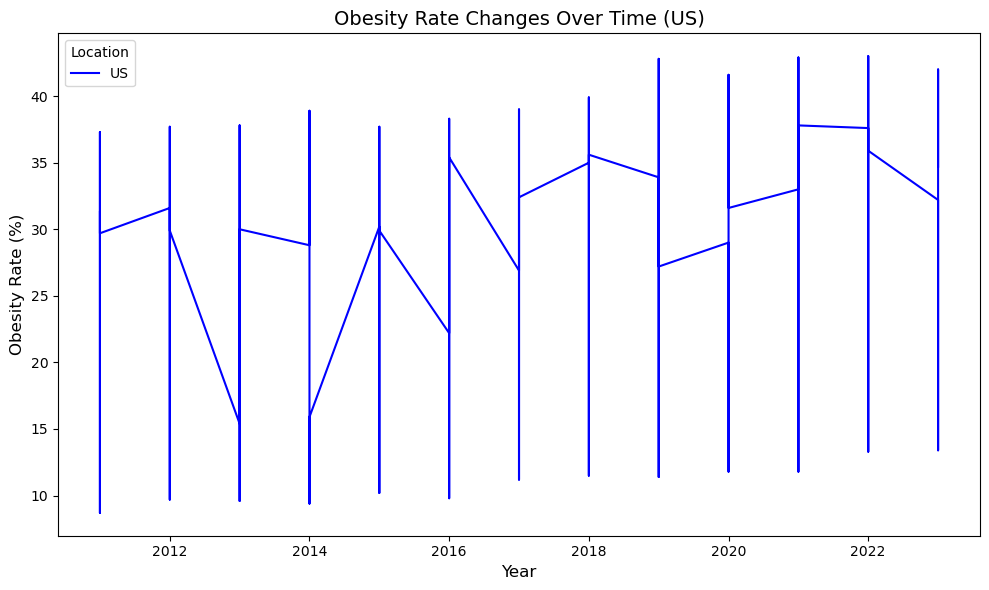

In [4]:
# Select relevant columns
columns_needed = ['LocationAbbr', 'YearStart', 'Question', 'Data_Value_Alt']
data_needed = raw_data[columns_needed]

# Clean data
cleaned_data = data_needed.dropna(subset=['Data_Value_Alt'])

# Filter for rows where the Question is about obesity
obesity_data = cleaned_data[cleaned_data['Question'].str.contains('Percent of adults aged 18 years and older who have obesity', case=False, na=False)]

# Filter for only the rows with 'US' in LocationAbbr (for national data)
obesity_data_us = obesity_data[obesity_data['LocationAbbr'] == 'US']

# Convert relevant columns to NumPy arrays for efficient manipulation
years = obesity_data_us['YearStart'].to_numpy()
obesity_rates = obesity_data_us['Data_Value_Alt'].to_numpy()

# Calculate statistical metrics for obesity rates
mean_rate = np.mean(obesity_rates)  # Mean
std_rate = np.std(obesity_rates)   # Standard deviation
max_rate = np.max(obesity_rates)   # Maximum value
min_rate = np.min(obesity_rates)   # Minimum value
median_rate = np.median(obesity_rates)  # Median

# Print the statistical metrics
print("Statistical Analysis of Obesity Rates (US):")
print(f"Mean Obesity Rate: {mean_rate:.2f}%")
print(f"Standard Deviation: {std_rate:.2f}%")
print(f"Maximum Obesity Rate: {max_rate:.2f}%")
print(f"Minimum Obesity Rate: {min_rate:.2f}%")
print(f"Median Obesity Rate: {median_rate:.2f}%")

# Plot the obesity rate change over time for the US
plt.figure(figsize=(10, 6))

# Use NumPy to plot the trend for the US
plt.plot(years, obesity_rates, label='US', color='blue')

# Add title and labels
plt.title('Obesity Rate Changes Over Time (US)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Obesity Rate (%)', fontsize=12)
plt.legend(title='Location', loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()


Question 3: What is the relationship between obesity rates and race in the United States?

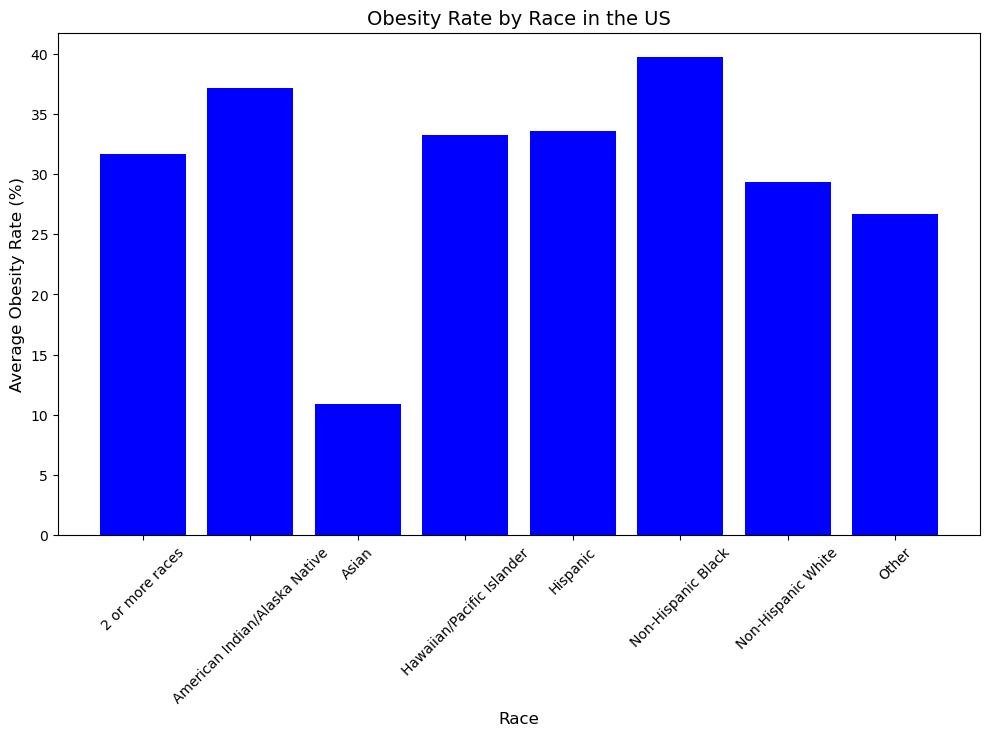

In [6]:

# Select relevant columns
columns_needed = ['LocationAbbr', 'YearStart', 'Question', 'Data_Value_Alt', 'Race/Ethnicity']
data_needed = raw_data[columns_needed]

# Clean data
cleaned_data = data_needed.dropna(subset=['Race/Ethnicity'])

# Filter for rows where the Question is about obesity
obesity_data = cleaned_data[cleaned_data['Question'].str.contains('Percent of adults aged 18 years and older who have obesity', case=False, na=False)]

# Filter for only the rows with 'US'
obesity_data_us = obesity_data[obesity_data['LocationAbbr'] == 'US']

# Group data by Race to calculate obesity rates for each race
obesity_by_race = obesity_data_us.groupby('Race/Ethnicity')['Data_Value_Alt'].mean().reset_index()

# Plot the obesity rates by race
plt.figure(figsize=(10, 6))
plt.bar(obesity_by_race['Race/Ethnicity'], obesity_by_race['Data_Value_Alt'], color='blue')

# Add title and labels
plt.title('Obesity Rate by Race in the US', fontsize=14)
plt.xlabel('Race', fontsize=12)
plt.ylabel('Average Obesity Rate (%)', fontsize=12)

# Display the plot
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


Question 4：What is the relationship between education levels and physical activity rates nationally?

C:\Users\elain\AppData\Local\Temp\ipykernel_17020\999015953.py:38: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1200x800 with 0 Axes>

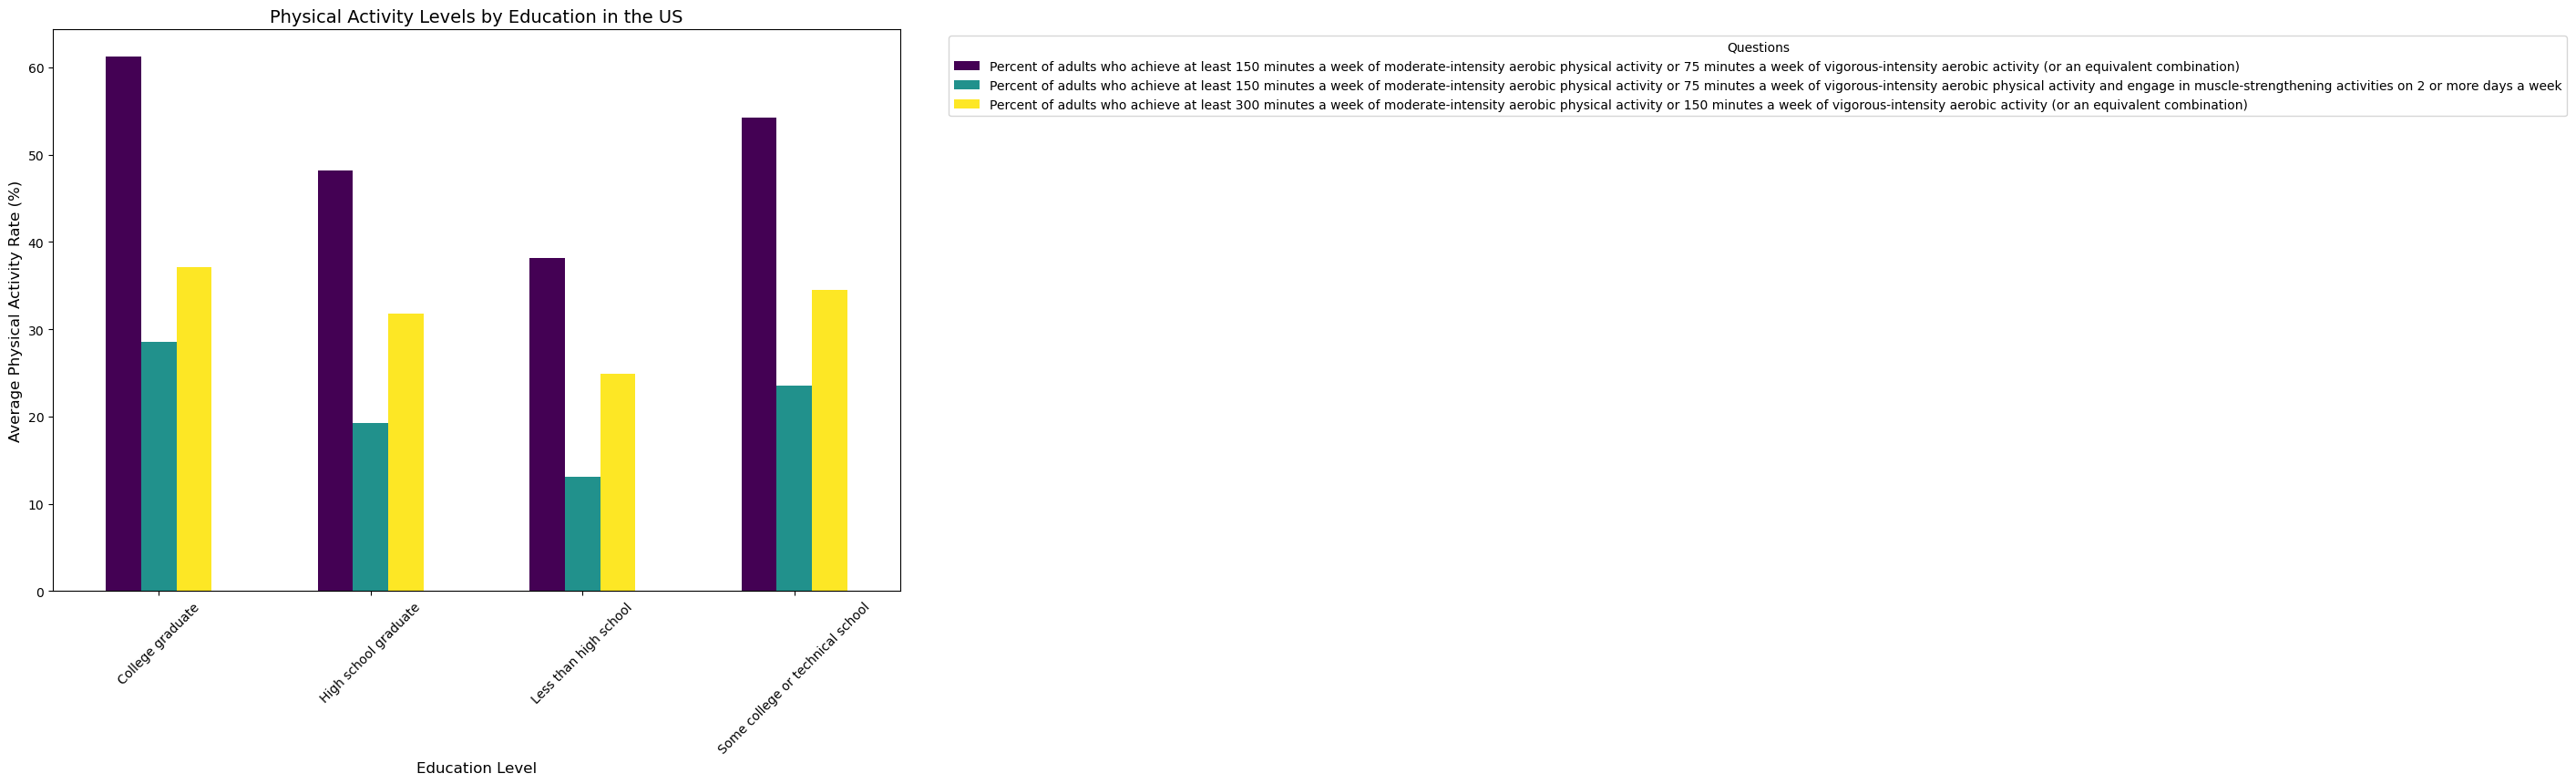

In [12]:
# Select relevant columns
columns_needed = ['LocationAbbr', 'Education', 'Question', 'Data_Value_Alt']
data_needed = raw_data[columns_needed]

# Clean and filter data
cleaned_data = data_needed[
    (data_needed['Education'].notnull()) &
    (data_needed['LocationAbbr'] == 'US')]

# Define the specific physical activity-related questions
questions_of_interest = [
    'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)',
    'Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)',
    'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week'
]

#  Filter rows based on the questions of interest
filtered_data = cleaned_data[cleaned_data['Question'].isin(questions_of_interest)]

# Group by education level and calculate the average for each question
grouped_data = filtered_data.groupby(['Education', 'Question'])['Data_Value_Alt'].mean().reset_index()

# Create a pivot table for visualization
pivot_table = grouped_data.pivot(index='Education', columns='Question', values='Data_Value_Alt')

# Plot the data
plt.figure(figsize=(12, 8))
pivot_table.plot(kind='bar', figsize=(12, 8), colormap='viridis')

# Add labels and title
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Average Physical Activity Rate (%)', fontsize=12)
plt.title('Physical Activity Levels by Education in the US', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Questions', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()


Question 5: What are the average obesity/overweight rates and physical activity rates in 2011 compared to 2021?

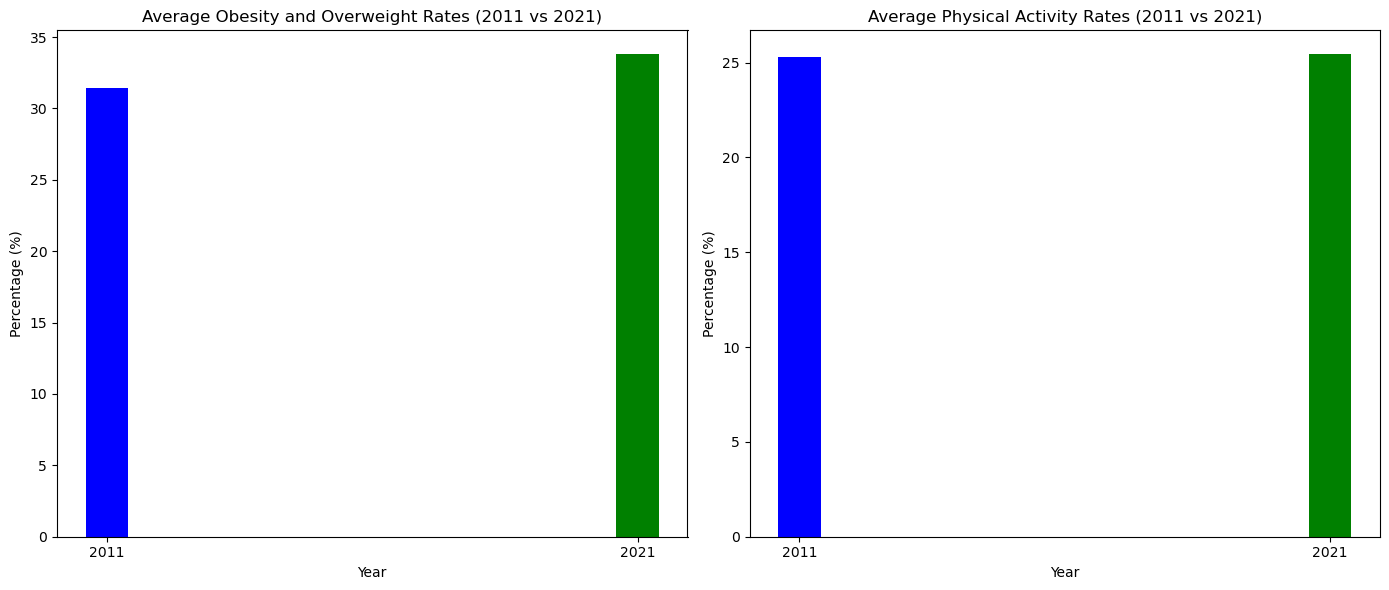

In [13]:
# Select required columns
data_needed = raw_data[['YearStart', 'LocationAbbr', 'Data_Value_Alt', 'Question']]

# Filter for specific years (2011 and 2021)
data_2011_2021 = data_needed[data_needed['YearStart'].isin([2011, 2021])]

# Filter data for the relevant questions
questions_of_interest = [
    "Percent of adults aged 18 years and older who have obesity",  # Obesity rate
    "Percent of adults aged 18 years and older who have an overweight classification",  # Overweight classification
    "Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week",  # Physical activity
    "Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity (or an equivalent combination)",  # Physical activity
    "Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic physical activity (or an equivalent combination)",  # Physical activity
    "Percent of adults who engage in no leisure-time physical activity",  # Physical activity
    "Percent of adults who engage in muscle-strengthening activities on 2 or more days a week"  # Physical activity
]

# Filter the data for the selected questions
filtered_data = data_2011_2021[data_2011_2021['Question'].isin(questions_of_interest)]

# Group by YearStart and calculate the average Data_Value_Alt for each year
grouped_data = filtered_data.groupby(['YearStart', 'Question'])['Data_Value_Alt'].mean().reset_index()

# Separate obesity-related and physical activity-related questions
obesity_questions = [
    "Percent of adults aged 18 years and older who have obesity",
    "Percent of adults aged 18 years and older who have an overweight classification"
]

physical_activity_questions = [
    "Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week",
    "Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity (or an equivalent combination)",
    "Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic physical activity (or an equivalent combination)",
    "Percent of adults who engage in no leisure-time physical activity",
    "Percent of adults who engage in muscle-strengthening activities on 2 or more days a week"
]

# Calculate average obesity and physical activity data for 2011 and 2021
obesity_data = grouped_data[grouped_data['Question'].isin(obesity_questions)].groupby('YearStart')['Data_Value_Alt'].mean()
physical_activity_data = grouped_data[grouped_data['Question'].isin(physical_activity_questions)].groupby('YearStart')['Data_Value_Alt'].mean()

# Create a plot for the combined data (obesity and physical activity)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Obesity and Overweight data
axes[0].bar(obesity_data.index, obesity_data.values, color=['blue', 'green'])
axes[0].set_title('Average Obesity and Overweight Rates (2011 vs 2021)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Percentage (%)')
axes[0].set_xticks([2011, 2021])

# Plot for Physical Activity data
axes[1].bar(physical_activity_data.index, physical_activity_data.values, color=['blue', 'green'])
axes[1].set_title('Average Physical Activity Rates (2011 vs 2021)')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Percentage (%)')
axes[1].set_xticks([2011, 2021])

# Show the plot
plt.tight_layout()
plt.show()


Question 6: In California, how has physical activity participation changed across different age groups over the years?

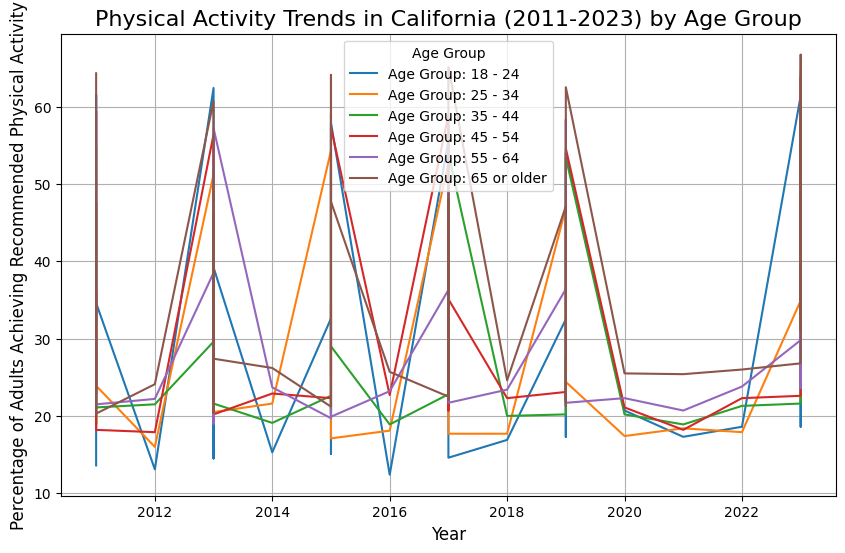

In [5]:
# Select needed columns
data_needed = raw_data[['YearStart', 'LocationAbbr', 'Age(years)', 'Data_Value_Alt', 'Question']]

# Filter the data for California (LocationAbbr = 'CA')
california_data = data_needed[data_needed['LocationAbbr'] == 'CA']

# Filter for the specific physical activity questions
physical_activity_data = california_data[
    california_data['Question'].str.contains('physical activity',case=False, na=False)]

# Filter out rows where 'Data_Value_Alt' is missing or NaN
cleaned_data = physical_activity_data.dropna(subset=['Data_Value_Alt'])

# Check and clean the data for 'Age (years)'
age_groups = ['18 - 24', '25 - 34','35 - 44','45 - 54', "55 - 64", "65 or older" ]
activity_by_age_group = cleaned_data[cleaned_data['Age(years)'].isin(age_groups)]

# Visualize the trends of physical activity by age group
plt.figure(figsize=(10, 6))

# Iterate over each age group to plot its physical activity data
for age_group in age_groups:
    # Filter data for the specific age group
    age_group_data = activity_by_age_group[activity_by_age_group['Age(years)'] == age_group]

    # Check if the age group data is empty (if not, plot)
    if not age_group_data.empty:
        plt.plot(age_group_data['YearStart'], age_group_data['Data_Value_Alt'], label=f'Age Group: {age_group}')

# Set the title, labels, and legend
plt.title('Physical Activity Trends in California (2011-2023) by Age Group', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage of Adults Achieving Recommended Physical Activity', fontsize=12)
plt.legend(title="Age Group", loc='best')
plt.grid(True)

# Show the plot
plt.show()


Question 7: How do obesity rates and physical activity participation rates differ between genders in California in 2023?

In [9]:
# Filter for California data in 2023
california_data_2023 = raw_data[
    (raw_data['YearStart'] == 2023) &
    (raw_data['LocationDesc'] == 'California')
]

# Clean data
cleaned_data = california_data_2023.dropna(subset=['Gender', 'Data_Value_Alt'])

# Define categories for analysis
obesity_questions = [
    "Percent of adults aged 18 years and older who have obesity",
    "Percent of adults aged 18 years and older who have an overweight classification"
]

physical_activity_questions = [
    "Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week",
    "Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)",
    "Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)",
    "Percent of adults who engage in no leisure-time physical activity",
    "Percent of adults who engage in muscle-strengthening activities on 2 or more days a week"
]

# Function to calculate the average value for a given question category
def calculate_average(data, questions):
    filtered_data = data[data['Question'].isin(questions)]
    return filtered_data.groupby('Gender')['Data_Value_Alt'].mean()

# Calculate averages for each category
obesity_rates = calculate_average(cleaned_data, obesity_questions)
physical_activity_rates = calculate_average(cleaned_data, physical_activity_questions)

# Display results
print("2023 California Gender Analysis:")
print("Obesity Rates by Gender:")
print(f"{obesity_rates}%")

print("\nPhysical Activity Participation by Gender:")
print(f"{physical_activity_rates}%")

2023 California Gender Analysis:
Obesity Rates by Gender:
Gender
Female    28.55
Male      35.35
Name: Data_Value_Alt, dtype: float64%

Physical Activity Participation by Gender:
Gender
Female    37.64
Male      41.86
Name: Data_Value_Alt, dtype: float64%


Question 8: How do obesity rates in the U.S. correlate with educational attainment levels in Texas, Florida, and New York?

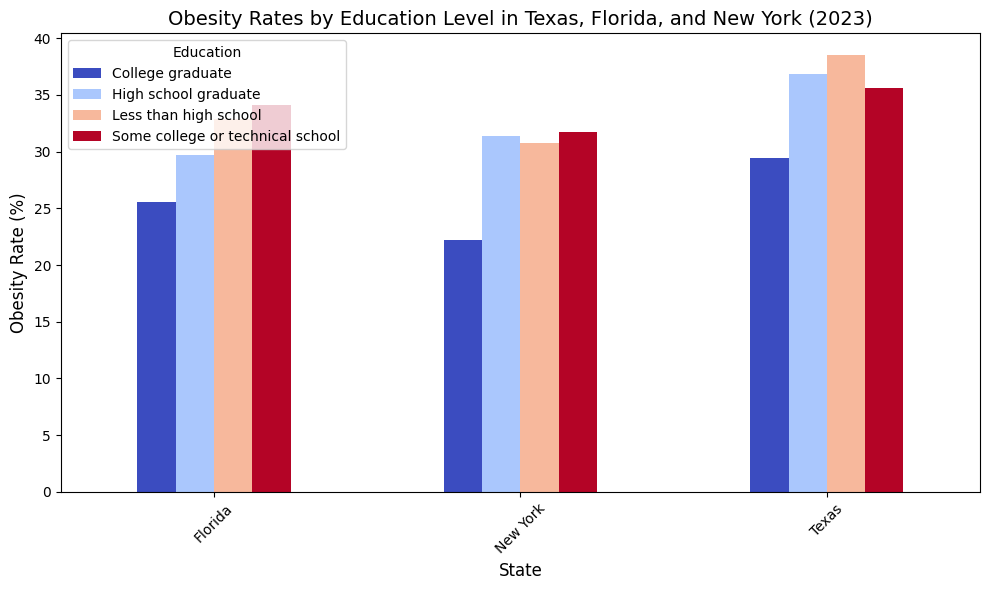

In [15]:
# Filter the data for 2023 and select the specific states (Texas, Florida, New York)
states = ['Texas', 'Florida', 'New York']
data_filtered = raw_data[
    (raw_data['YearStart'] == 2023) &  # Filter for the year 2023
    (raw_data['LocationDesc'].isin(states)) &  # Filter for the states of interest
    (raw_data['Question'].str.contains("obesity", case=False, na=False)) &  # Filter for obesity-related questions
    (raw_data['Education'].notnull())  # Remove rows where the Education column is null
]

# Clean data
data_cleaned = data_filtered.dropna(subset=['Data_Value_Alt', 'Education'])

# Get unique education levels for reference
education_levels = data_cleaned['Education'].unique()

# Group the data by LocationDesc (state) and Education, then calculate the average obesity rate for each combination
obesity_by_education = data_cleaned.groupby(['LocationDesc', 'Education'])['Data_Value_Alt'].mean().unstack()

# Visualization: Create a bar chart to show the obesity rates by education level in each state
obesity_by_education.plot(kind='bar', figsize=(10, 6), colormap='coolwarm')

# Add labels and title
plt.title('Obesity Rates by Education Level in Texas, Florida, and New York (2023)', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Obesity Rate (%)', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout for better display

# Show the plot
plt.show()


Question 9: How do muscle-strengthening activity participation rates compare across Texas, Florida, and New York?

In [8]:
# Define parameters
states = ['Texas', 'Florida', 'New York']
activity_question = "Percent of adults who engage in muscle-strengthening activities on 2 or more days a week"

# Filter data for 2023, specific states, and the relevant question
filtered_data = raw_data[
    (raw_data['YearStart'] == 2023) &
    (raw_data['LocationDesc'].isin(states)) &
    (raw_data['Question'] == activity_question)
]

# Clean data
cleaned_data = filtered_data.dropna(subset=['Data_Value_Alt'])

# Calculate average participation rate by state and gender
results = cleaned_data.groupby(['LocationDesc', 'Gender'])['Data_Value_Alt'].mean()

# Display the results
print("Muscle-Strengthening Activity Participation in 2023 by State and Gender:")
print(results)


Muscle-Strengthening Activity Participation in 2023 by State and Gender:
LocationDesc  Gender
Florida       Female    39.3
              Male      48.4
New York      Female    38.3
              Male      45.7
Texas         Female    38.2
              Male      47.8
Name: Data_Value_Alt, dtype: float64


Question 10: Which are the top and bottom three US states in terms of obesity rates, physical activity levels, and fruit and vegetable consumption?

In [10]:
# Select relevant columns and questions for analysis
columns_needed = ['LocationDesc', 'Question', 'Data_Value_Alt']
questions_of_interest = [
    "Percent of adults aged 18 years and older who have obesity",  # Obesity rates
    "Percent of adults aged 18 years and older who have an overweight classification",
    "Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week",
    "Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)",
    "Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)",
    "Percent of adults who engage in no leisure-time physical activity",  # Physical activity
    "Percent of adults who report consuming fruit less than one time daily",  # Fruit consumption
    "Percent of adults who report consuming vegetables less than one time daily"  # Vegetable consumption
]

# Filter data for relevant questions
filtered_data = raw_data[
    (raw_data['Question'].isin(questions_of_interest)) &
    (raw_data['LocationDesc'].notnull()) &
    (raw_data['Data_Value_Alt'].notnull())
][columns_needed]

# Define groups with their respective questions
groups = {
    "Weight-related Questions": [
        "Percent of adults aged 18 years and older who have obesity",
        "Percent of adults aged 18 years and older who have an overweight classification"
    ],
    "Physical Activity-related Questions": [
        "Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity and engage in muscle-strengthening activities on 2 or more days a week",
        "Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)",
        "Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)",
        "Percent of adults who engage in no leisure-time physical activity"
    ],
    "Food-related Questions": [
        "Percent of adults who report consuming fruit less than one time daily",
        "Percent of adults who report consuming vegetables less than one time daily"
    ]
}

# Function to calculate combined statistics for each group
def calculate_group_statistics(data, questions):
    """
    Calculate the average value for each state across a group of questions.

    Parameters:
        data (DataFrame): Filtered dataset.
        questions (list): List of questions in the group.

    Returns:
        grouped_stats (Series): Average values by state for the group.
    """
    subset = data[data['Question'].isin(questions)]
    grouped_stats = subset.groupby('LocationDesc')['Data_Value_Alt'].mean().sort_values()
    return grouped_stats

# Analyze each group and store results
group_results = {}
for group_name, questions in groups.items():
    group_stats = calculate_group_statistics(filtered_data, questions)
    group_results[group_name] = {
        'Top States': group_stats.tail(3),  # Top 3 states
        'Bottom States': group_stats.head(3)  # Bottom 3 states
    }

# Display results for each group
for group_name, stats in group_results.items():
    print(f"\n=== {group_name} ===")
    print("Top 3 States:")
    print(stats['Top States'])
    print("\nBottom 3 States:")
    print(stats['Bottom States'])


# Save the grouped results to a CSV for further analysis
output_data = []
for group_name, stats in group_results.items():
    for state, value in stats['Top States'].items():
        output_data.append({'Group': group_name, 'State': state, 'Value': value, 'Rank': 'Top'})
    for state, value in stats['Bottom States'].items():
        output_data.append({'Group': group_name, 'State': state, 'Value': value, 'Rank': 'Bottom'})

# Convert to a DataFrame
output_df = pd.DataFrame(output_data)

# Save to CSV
output_df.to_csv('grouped_analysis_results.csv', index=False)
print("\nGrouped analysis results saved to 'grouped_analysis_results.csv'.")



=== Weight-related Questions ===
Top 3 States:
LocationDesc
Louisiana        34.826161
Mississippi      35.463559
West Virginia    35.491639
Name: Data_Value_Alt, dtype: float64

Bottom 3 States:
LocationDesc
District of Columbia    27.877676
Colorado                29.163649
Hawaii                  29.647633
Name: Data_Value_Alt, dtype: float64

=== Physical Activity-related Questions ===
Top 3 States:
LocationDesc
Florida        35.080438
Puerto Rico    35.110582
Montana        35.193874
Name: Data_Value_Alt, dtype: float64

Bottom 3 States:
LocationDesc
Utah              31.641911
North Carolina    31.981664
Pennsylvania      31.997096
Name: Data_Value_Alt, dtype: float64

=== Food-related Questions ===
Top 3 States:
LocationDesc
Guam           35.954667
Louisiana      36.216216
Puerto Rico    48.604762
Name: Data_Value_Alt, dtype: float64

Bottom 3 States:
LocationDesc
Vermont          24.385211
Maine            24.670748
New Hampshire    25.628873
Name: Data_Value_Alt, dtype: flo